# Netflix Data Analysis Project
**By Keerthana Sambhu**  
This project explores Netflix’s content library, including movies and TV shows, genres, ratings, and trends over time.  

In [2]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries

In [42]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set(style='whitegrid')


# Load the dataset

In [50]:
# Load Netflix dataset
df = pd.read_csv("C:/Users/keert/Desktop/netflix_analysis_project/data/netflix_titles.csv")
df.head()

# Check dataset shape and basic info
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Cleaning the Dataset
In this step, we will:
- Clean column names
- Convert dates
- Parse durations
- Split genres
- Handle missing values
- Remove duplicates

In [45]:
# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
df.head(2)


# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create a new column for the year the title was added
df['added_year'] = df['date_added'].dt.year

df[['title','date_added','added_year']].head(5)


def parse_duration(d):
    if d is None or pd.isna(d):
        return None
    d = d.strip()
    if 'min' in d:
        return int(d.replace('min','').strip())
    elif 'Season' in d:  # handles '1 Season' or '2 Seasons'
        return int(d.split()[0])
    else:
        return None

df['duration_parsed'] = df['duration'].apply(parse_duration)
df[['title','type','duration','duration_parsed']].head(5)


# Split genres into a list safely
df['genres'] = df['listed_in'].str.split(',').apply(lambda x: [g.strip() for g in x] if x is not None else [])

# Explode genres for easier analysis
df_genres = df.explode('genres')

df_genres[['title','listed_in','genres']].head(10)


# Fill missing values for important columns
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

# Optional: keep director and cast as NaN (not critical)


# Drop duplicate titles (based on title, release_year, type)
df = df.drop_duplicates(subset=['title','release_year','type'])
df.shape


# Quick look at cleaned dataset
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         6173 non-null   object        
 4   cast             7982 non-null   object        
 5   country          8807 non-null   object        
 6   date_added       8709 non-null   datetime64[ns]
 7   release_year     8807 non-null   int64         
 8   rating           8807 non-null   object        
 9   duration         8804 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
 12  added_year       8709 non-null   float64       
 13  duration_parsed  8804 non-null   float64       
 14  genres           8807 non-null   object 

# Exploratory Data Analysis (EDA)
In this step, we will:
- Explore Movies vs TV Shows
- Explore genre popularity
- Explore ratings distribution
- Explore trends over time

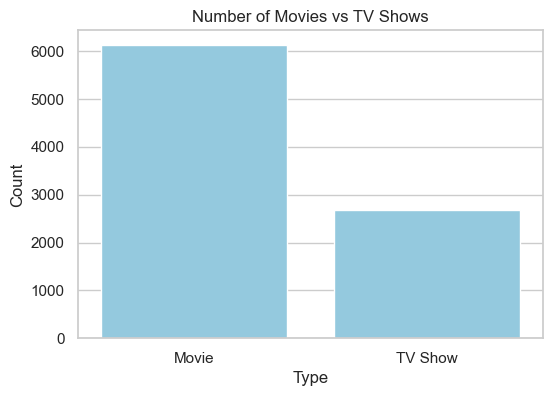

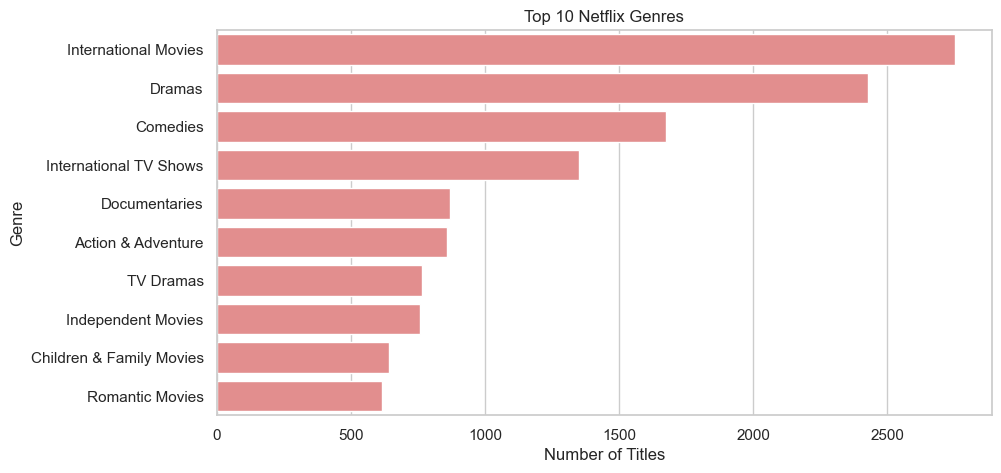

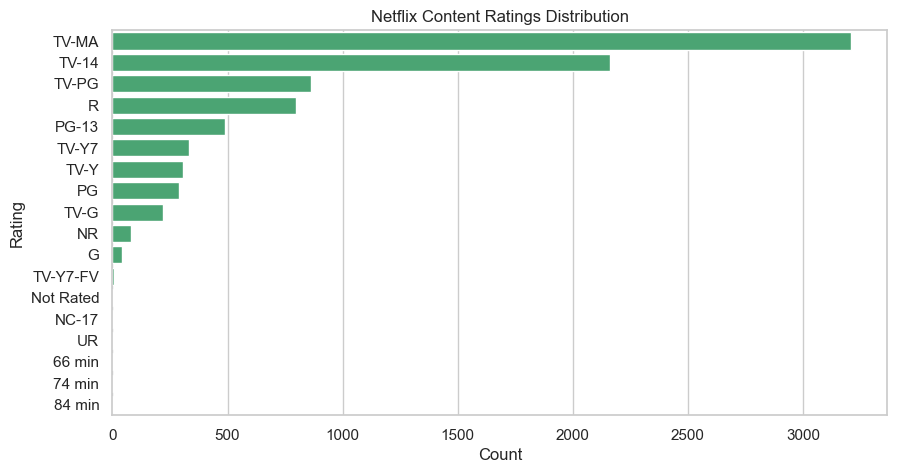

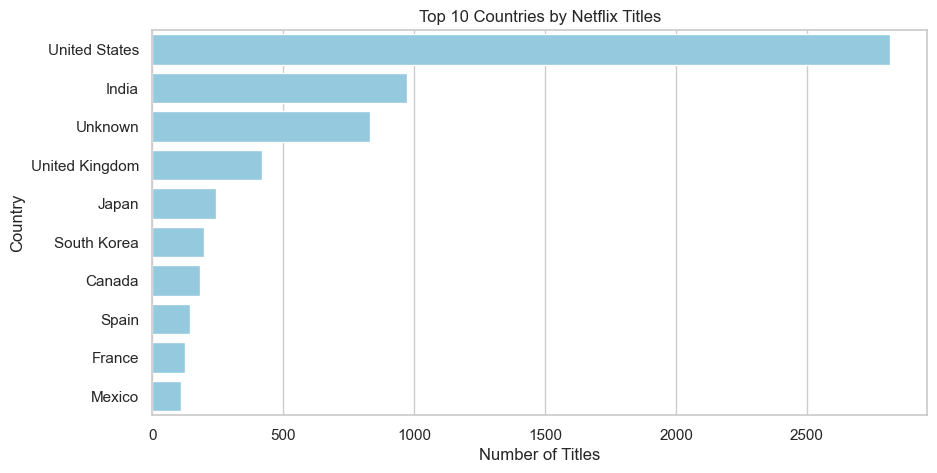

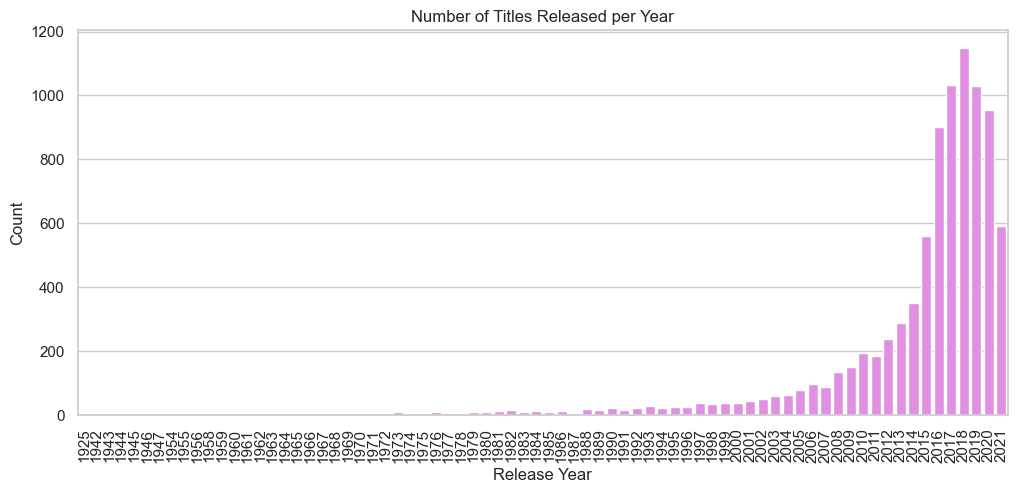

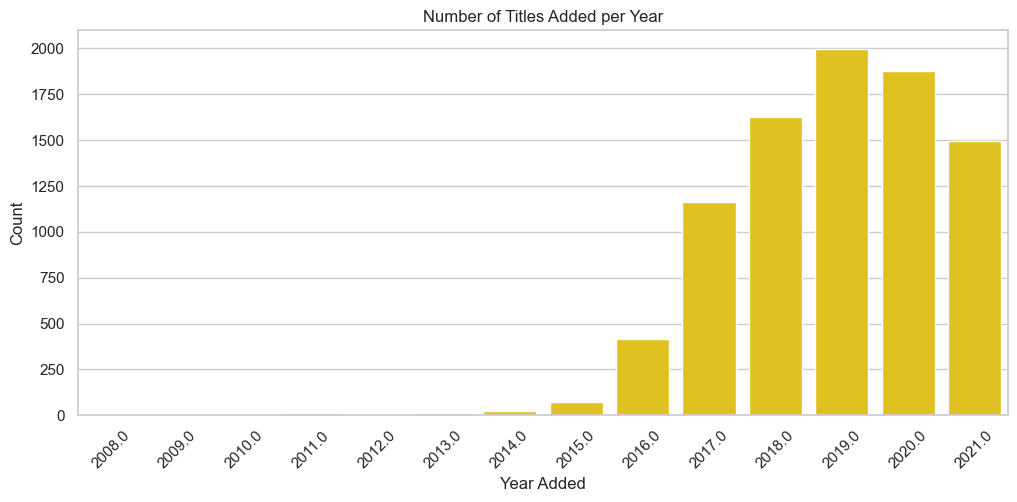

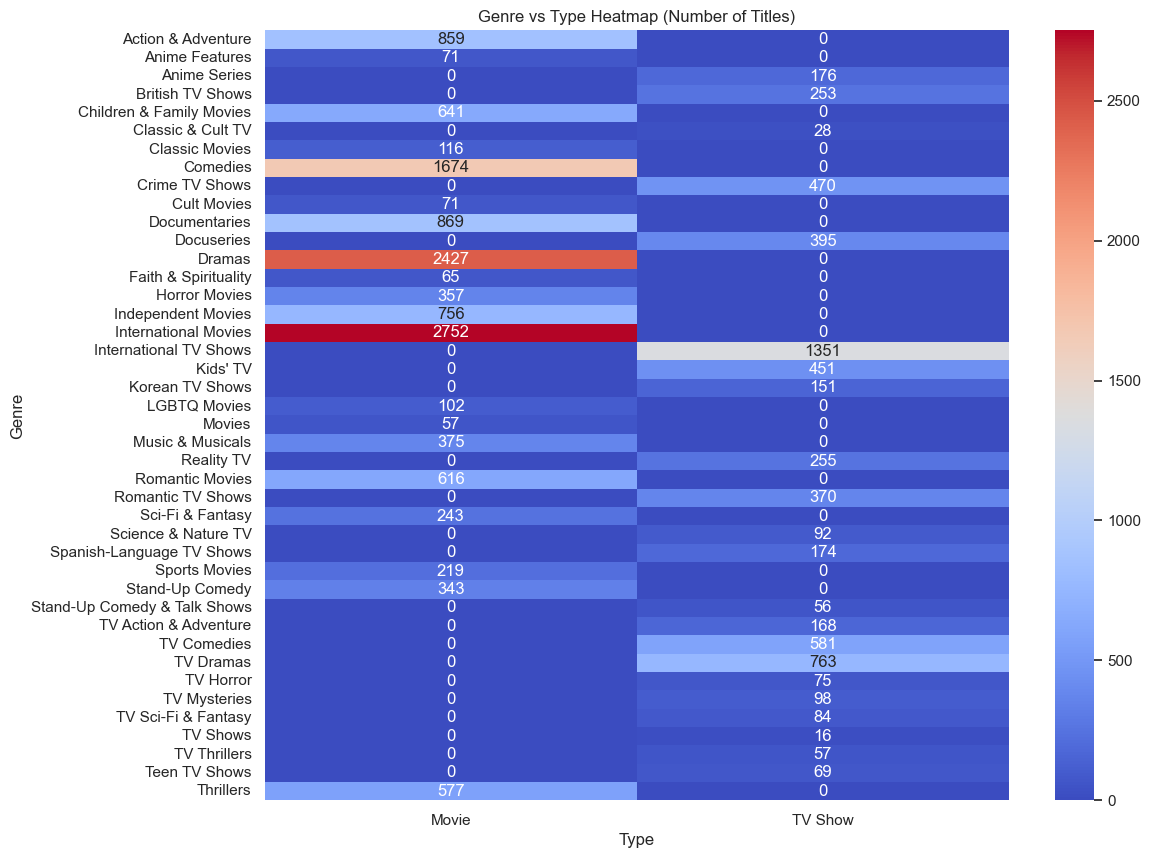

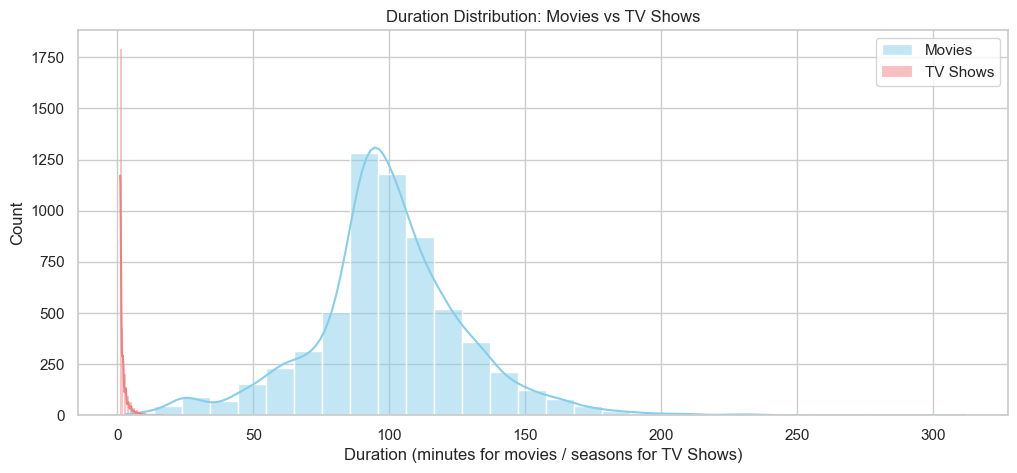


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


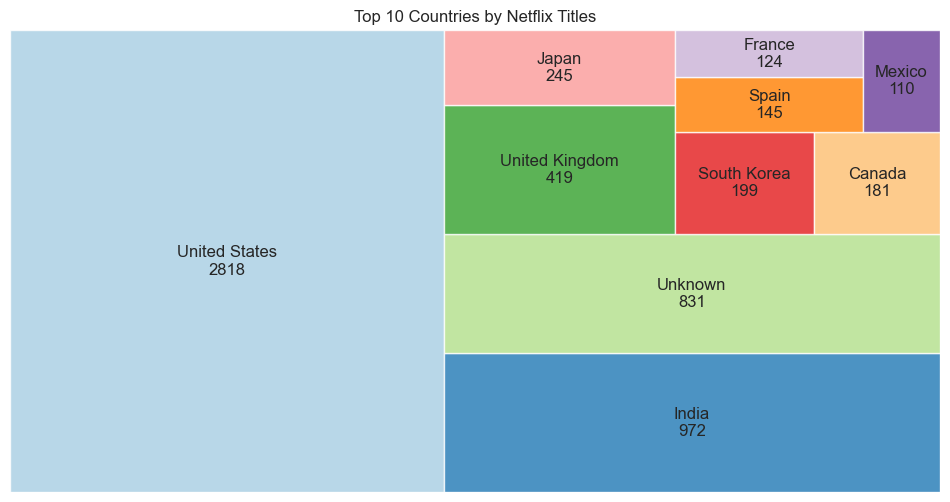

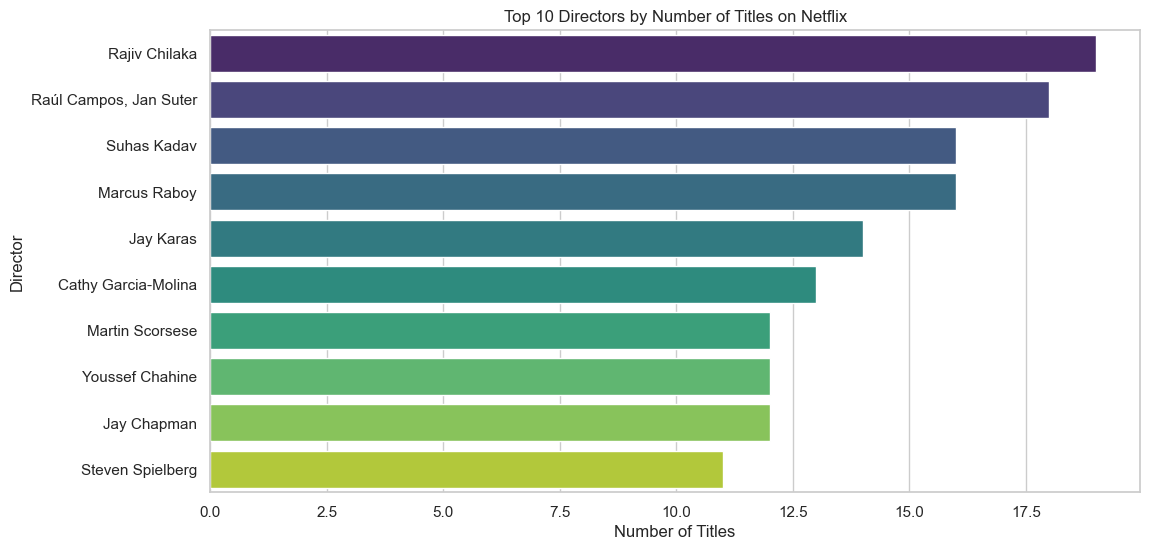

In [44]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', color='skyblue')
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


top_genres = df_genres['genres'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, color='lightcoral')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, color='mediumseagreen')
plt.title('Netflix Content Ratings Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, color='skyblue')
plt.title('Top 10 Countries by Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


plt.figure(figsize=(12,5))
sns.countplot(data=df, x='release_year', color='violet', order=sorted(df['release_year'].unique()))
plt.title('Number of Titles Released per Year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12,5))
sns.countplot(data=df, x='added_year', color='gold', order=sorted(df['added_year'].dropna().unique()))
plt.title('Number of Titles Added per Year')
plt.xticks(rotation=45)
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()


# Create a pivot table: counts of type per genre
genre_type = df_genres.pivot_table(index='genres', columns='type', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(genre_type, annot=True, fmt='d', cmap='coolwarm')
plt.title('Genre vs Type Heatmap (Number of Titles)')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.show()


plt.figure(figsize=(12,5))

# Movies
sns.histplot(df[df['type']=='Movie']['duration_parsed'].dropna(), bins=30, color='skyblue', label='Movies', kde=True)

# TV Shows
sns.histplot(df[df['type']=='TV Show']['duration_parsed'].dropna(), bins=30, color='lightcoral', label='TV Shows', kde=True)

plt.title('Duration Distribution: Movies vs TV Shows')
plt.xlabel('Duration (minutes for movies / seasons for TV Shows)')
plt.ylabel('Count')
plt.legend()
plt.show()


!pip install squarify


import squarify 

top_countries = df['country'].value_counts().head(10)
sizes = top_countries.values
labels = top_countries.index + '\n' + top_countries.astype(str)

plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes, label=labels, color=sns.color_palette('Paired', len(sizes)), alpha=0.8)
plt.title('Top 10 Countries by Netflix Titles')
plt.axis('off')
plt.show()


top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


# Extra Analysis / Insights
In this step, we will explore:
- Top 10 actors
- Correlation of rating with type/genre
- Fun summary charts

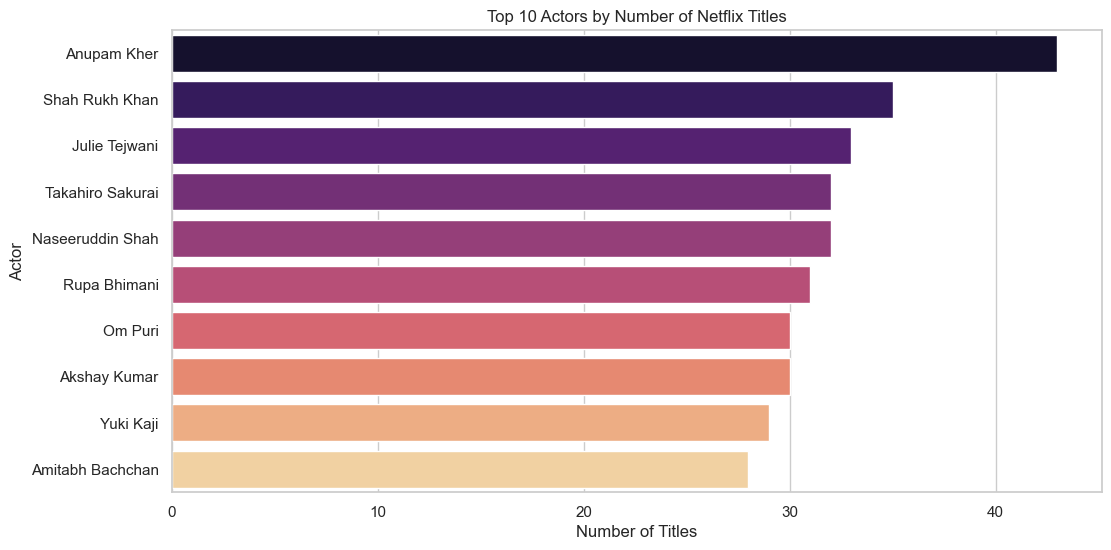

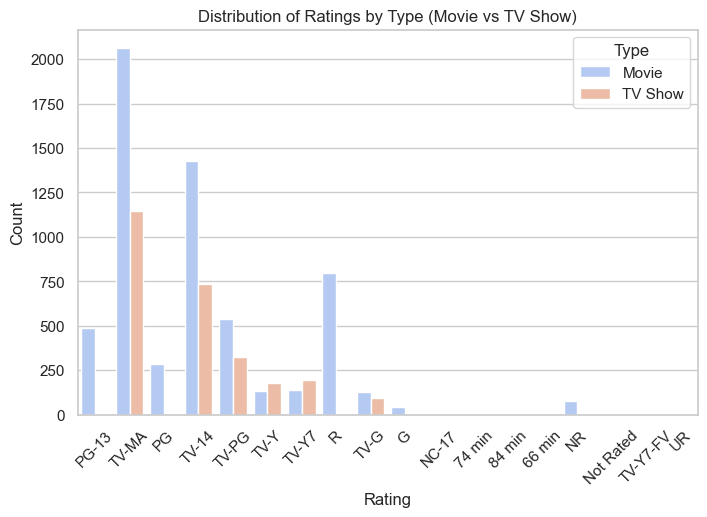

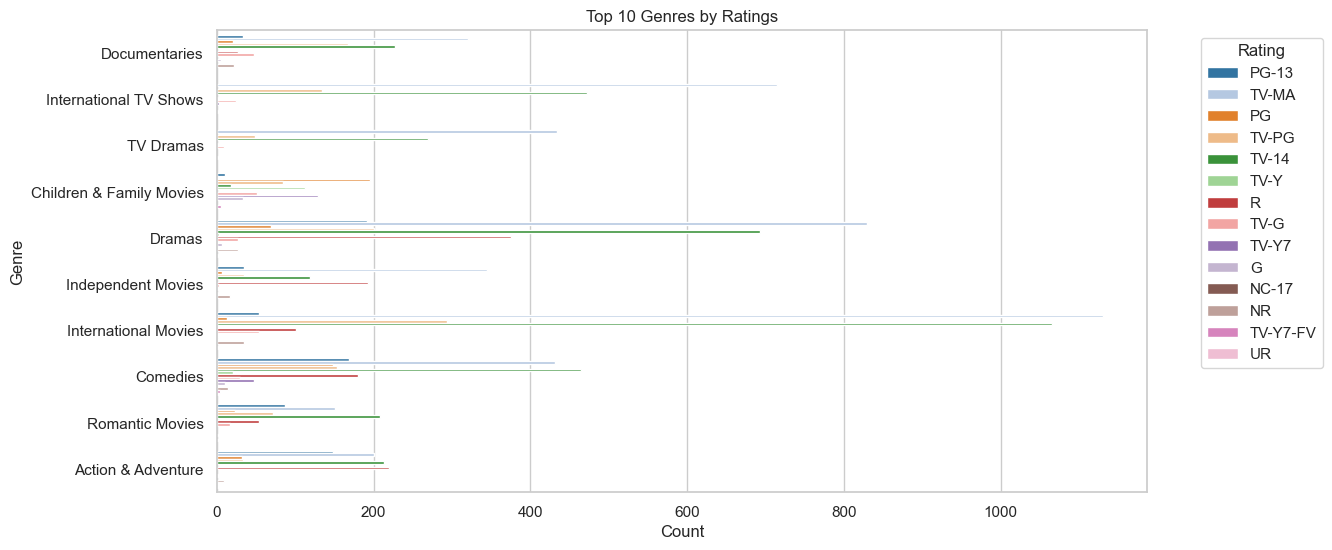

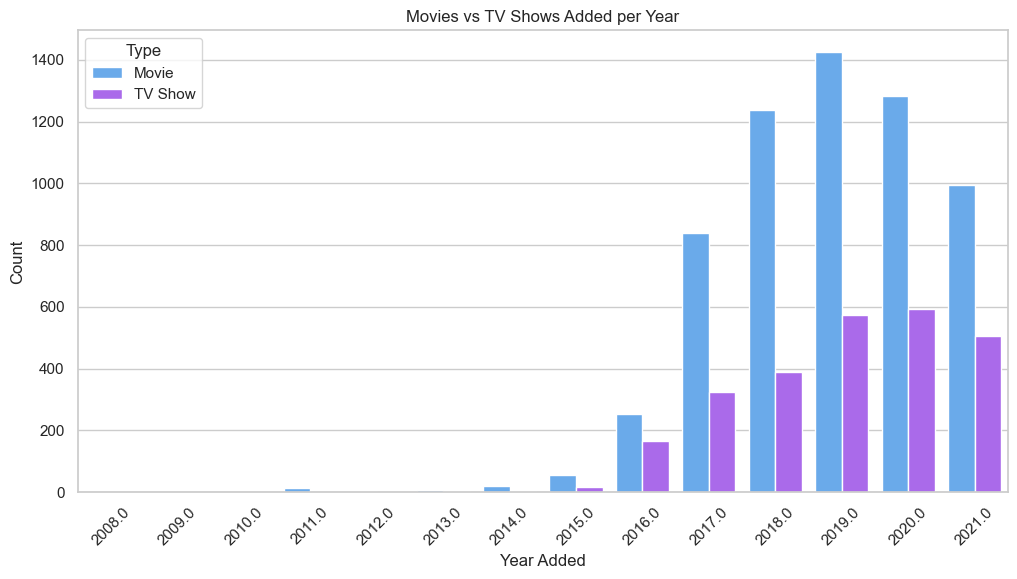

In [43]:
# Split cast column into individual actors
df_cast = df.copy()
df_cast['cast_list'] = df_cast['cast'].str.split(',').apply(lambda x: [a.strip() for a in x] if isinstance(x, list) else [])

# Explode to have one actor per row
df_actors = df_cast.explode('cast_list')

# Count top 10 actors
top_actors = df_actors['cast_list'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='magma')
plt.title('Top 10 Actors by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(data=df, x='rating', hue='type', palette='coolwarm')
plt.title('Distribution of Ratings by Type (Movie vs TV Show)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


# Top 10 genres for plotting
top_genres_list = df_genres['genres'].value_counts().head(10).index
df_top_genres = df_genres[df_genres['genres'].isin(top_genres_list)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_genres, y='genres', hue='rating', palette='tab20')
plt.title('Top 10 Genres by Ratings')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


plt.figure(figsize=(12,6))
sns.countplot(data=df, x='added_year', hue='type', palette='cool', order=sorted(df['added_year'].dropna().unique()))
plt.title('Movies vs TV Shows Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


# Conclusion
- Netflix has more Movies than TV Shows
- Most popular genres: International, Dramas, Comedies
- Top countries producing content: USA, India, UK
- Top actors and directors dominate multiple titles
- Netflix content trends: more titles added each year, TV shows gaining popularity

**Keerthana Sambhu — Project Complete!**